Name : Nitish Adhikari

Contact : +91 9650740295 (nitishbuzzpro@gmail.com)

Linkedin : https://www.linkedin.com/in/nitish-adhikari-6b2350248 

Github : https://github.com/nitishbuzzpro

# PROJECT : Analyise logs form Healthapp and build the Analytics solution

In [1]:
import piplite
await piplite.install('numpy')
await piplite.install('pandas')
await piplite.install('matplotlib')
await piplite.install('seaborn')

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Create dataframe
df = pd.read_csv('HealthApp_2k.log_structured.csv')
df = df.set_index('LineId') 
df 

,Time,Component,Pid,Content,EventId,EventTemplate
LineId,,,,,,
1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data
...,...,...,...,...,...,...
1996,20171224-0:58:53:985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1997,20171224-0:59:7:581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1998,20171224-1:0:0:794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...


In [4]:
#Check for Null values
df.isnull().sum()

Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64

In [5]:
df.columns

Index(['Time', 'Component', 'Pid', 'Content', 'EventId', 'EventTemplate'], dtype='object')

In [6]:
#template data frame
df_template = pd.read_csv('HealthApp_2k.log_templates.csv')
df_template

,EventId,EventTemplate
0,E1,Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
1,E2,"bulkSaveDetailHiHealthData() size = <*>,totalT..."
2,E3,calculateAltitudeWithCache totalAltitude=<*>
3,E4,calculateCaloriesWithCache totalCalories=<*>
4,E5,"checkCurrentDay a new day comes , reset basicS..."
...,...,...
70,E71,tryToReloadTodayBasicSteps<*>|<*>|<*>|<*>
71,E72,"upLoadOneMinuteDataToEngine time=<*>,<*>,<*>,<..."
72,E73,uploadStaticsToDB failed message=true
73,E74,uploadStaticsToDB() onResult type = <*> obj=true


In [7]:
df['Time'] =  pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df

,Time,Component,Pid,Content,EventId,EventTemplate
LineId,,,,,,
1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data
...,...,...,...,...,...,...
1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...


In [8]:
#Total Log time
total_log_time = df['Time'].iloc[-1] - df['Time'].iloc[0]
total_log_time

Timedelta('0 days 02:47:06.183000')

# STEPS ANLYSIS

In [9]:
def data_extracter(content):
    global max_count
    if content.split(' ')[0] ==  'onStandStepChanged':
        max_count = int(content.split(' ')[1])
        return max_count
    else:
        return None 

In [10]:
df['Step_change_Count'] = df['Content'].apply(data_extracter)
df

,Time,Component,Pid,Content,EventId,EventTemplate,Step_change_Count
LineId,,,,,,,
1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,3579.0
2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,NaN
3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,NaN
4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,NaN
5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,NaN
...,...,...,...,...,...,...,...
1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN
1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN
1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN


Text(0.5, 1.0, 'Histogram of Active Time')

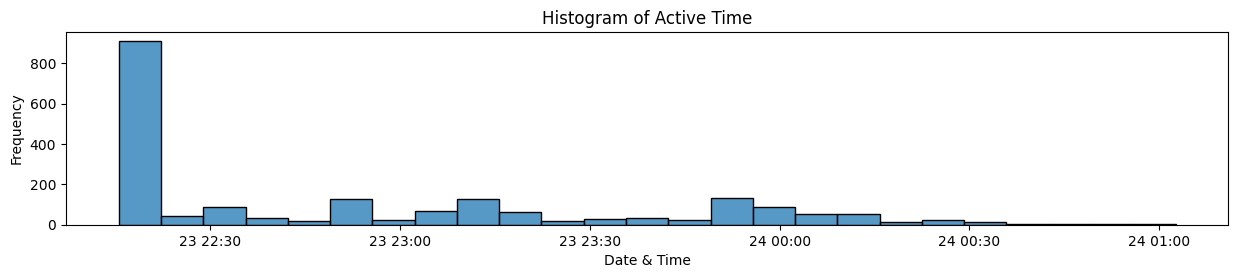

In [35]:
#Histogram of Time when the person is most active
plt.figure(figsize=(15,2.5))
histogram = sns.histplot(df[(df['Step_change_Count']!=None)]['Time'], bins=25)
plt.xlabel('Date & Time')
plt.ylabel('Frequency')
plt.title('Histogram of Active Time')

In [12]:
def timestamp_to_datetime(timestamp):
    from datetime import datetime, timedelta
    epoch = datetime(1970, 1, 1)
    datetime = epoch + timedelta(days=timestamp)
    
    return datetime.strftime("%Y-%m-%d %H:%M:%S")

In [13]:
#Determine the time range when person is most active

bars = [rect.get_height() for rect in histogram.patches]
bins = [rect.get_x() for rect in histogram.patches]

index_max_height = bars.index(max(bars))

range_of_bar = (bins[index_max_height],bins[index_max_height+1])

date_time_range = []

for i in range_of_bar:
    date_time_range.append(timestamp_to_datetime(i))

date_time_range

['2017-12-23 22:15:29', '2017-12-23 22:22:10']

In [14]:
#Total number of steps taken
total_Steps_taken = df['Step_change_Count'].max() - df['Step_change_Count'].min()
total_Steps_taken

207.0

Text(0, 0.5, 'Steps_Count')

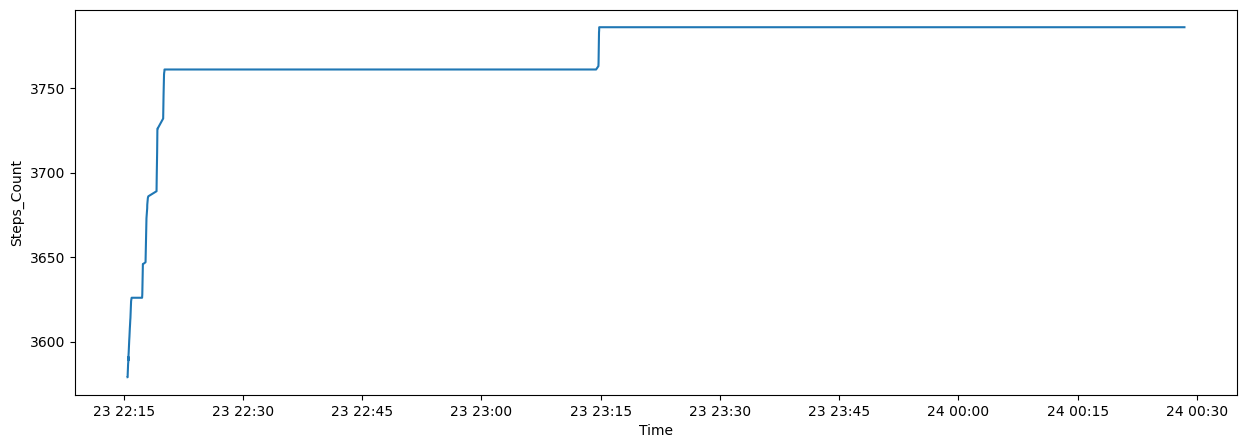

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Time'] , y = df[df['Step_change_Count']!=None]['Step_change_Count'])
plt.xlabel('Time')
plt.ylabel('Steps_Count')

In [16]:
#Time after When a person is idle(not moving)
time_idle = df[['Time']][df['Step_change_Count']==df['Step_change_Count'].max()].iloc[0]
time_idle 

Time   2017-12-23 23:14:48.606
Name: 1425, dtype: datetime64[ns]

# CALORIES ANALYSIS

In [17]:
def calorie_data_extracter(content):
    if content.split('=')[0] ==  'calculateCaloriesWithCache totalCalories':
        max_calorie_count = int(content.split('=')[1])
        return max_calorie_count
    else:
        return None

In [18]:
df['Calorie_change_count'] = df['Content'].apply(calorie_data_extracter)
df[df['EventTemplate']== 'calculateCaloriesWithCache totalCalories=<*>']
df

,Time,Component,Pid,Content,EventId,EventTemplate,Step_change_Count,Calorie_change_count
LineId,,,,,,,,
1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,3579.0,NaN
2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,NaN,NaN
3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,NaN,NaN
4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,NaN,NaN
5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,NaN,NaN
...,...,...,...,...,...,...,...,...
1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN,NaN
1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN,NaN
1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN,NaN


Text(0, 0.5, 'Calorie_Count')

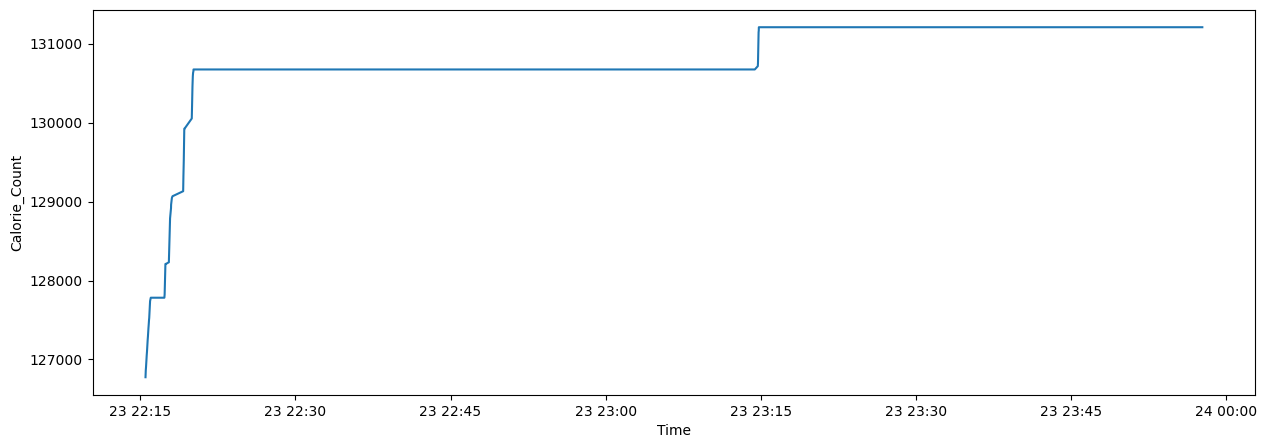

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Time'] , y=df[(df['Calorie_change_count']!=0) & (df['Calorie_change_count']!=None)]['Calorie_change_count'])
plt.xlabel('Time')
plt.ylabel('Calorie_Count')

In [20]:
#Total calories burnt 
max_calorie_count = df[(df['EventTemplate']== 'calculateCaloriesWithCache totalCalories=<*>') & (df['Calorie_change_count'] != 0)]['Calorie_change_count'].max()
min_calorie_count = df[(df['EventTemplate']== 'calculateCaloriesWithCache totalCalories=<*>') & (df['Calorie_change_count'] != 0)]['Calorie_change_count'].min()
Total_calories_burnt = max_calorie_count - min_calorie_count
Total_calories_burnt

4433.0

Text(0.5, 1.0, 'Histogram of excercise Time')

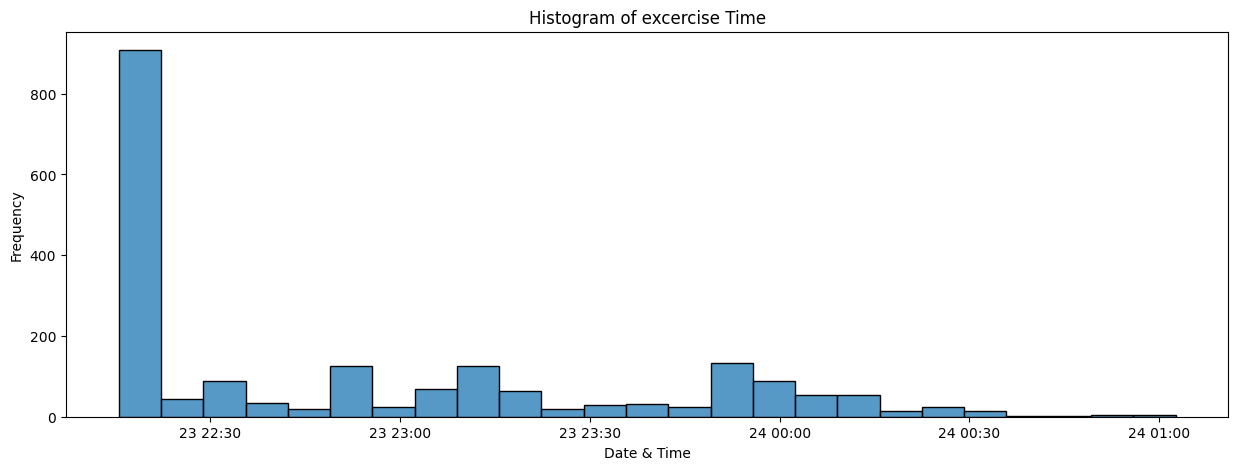

In [21]:
#Histogram of Time when the person is excercing
plt.figure(figsize=(15,5))
histogram2 = sns.histplot(df[(df['Calorie_change_count']!=None)]['Time'], bins=25)
plt.xlabel('Date & Time')
plt.ylabel('Frequency')
plt.title('Histogram of excercise Time')

In [22]:
#Determine the time range when person is most active

bars = [rect.get_height() for rect in histogram2.patches]
bins = [rect.get_x() for rect in histogram2.patches]

index_max_height = bars.index(max(bars))

range_of_bar = (bins[index_max_height],bins[index_max_height+1])

date_time_range2 = []

for i in range_of_bar:
    date_time_range2.append(timestamp_to_datetime(i))

date_time_range2

['2017-12-23 22:15:29', '2017-12-23 22:22:10']

In [23]:
#Time after the person sleeps
sleep_time = df[df['Calorie_change_count']==max_calorie_count]['Time'].iloc[0]
sleep_time

Timestamp('2017-12-23 23:14:48.922000')

# Anlytical Solutions

### 1. Total recorded time period in the Log

In [24]:
total_log_time

Timedelta('0 days 02:47:06.183000')

### 2. The time range when the person is most active

In [25]:
date_time_range

['2017-12-23 22:15:29', '2017-12-23 22:22:10']

### 3. Total number of steps taken by the person

In [26]:
total_Steps_taken

207.0

### 4. Time after which the person not walking

In [27]:
time_idle

Time   2017-12-23 23:14:48.606
Name: 1425, dtype: datetime64[ns]

### 5. Total Calories Burnt

In [28]:
Total_calories_burnt

4433.0

### 6. Time range when the maximum calories are burnt/ exercising

In [29]:
date_time_range2

['2017-12-23 22:15:29', '2017-12-23 22:22:10']

### 7. Time after the person sleeps

In [30]:
sleep_time

Timestamp('2017-12-23 23:14:48.922000')